# WeatherPy
----
Observations and Insights

After analyzing the graphs, several considerations can be made, including the following:
- The Northern Hemisphere displays a negative slope with a negative correlation between Temperature and Latitude, however the Southern Hemisphere displays a positive slope with a positive correlation between Temperature and Latitude. In other words, as you move away from the equator in the Northern Hemisphere the temperature decreases. Conversely, as you move away from the equator in the Southern Hemisphere the temperature increases
- The graphs show that there are no clear relationship beetween Humidity and Latitude in the northern and Southern Hemisphere. We can however observe a weak positive correlation between latitude and humidity
- There are no clear relationship between Latitude and Wind Speed in the graphs. We can observe a weak positive correlation between latitude and Wind Speed for northern hemisphere and weak negative correlation between latitude and Wind Speed for Southern hemisphere.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

607

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Create a dataframe to store the data
city_weather = pd.DataFrame({'City': cities, 'Cloudiness': "", 'Country': "", 'Date': "",
                            'Humidity': "", 'Lat': "", 'Lng': "", 'Max Temp': "", 'Windspeed': ""})

#Preview the dataframe
city_weather.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,cape town,,,,,,,,
1,ushuaia,,,,,,,,
2,bengkulu,,,,,,,,
3,soyo,,,,,,,,
4,nikolskoye,,,,,,,,


In [5]:
#Variables 
record_num = 1
record_set = 1

#Base url to make the api call
base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial&q='
#Run the API call for each city
print('''
-----------------------------
Beginning Data Retrieval
-----------------------------''')



-----------------------------
Beginning Data Retrieval
-----------------------------


In [6]:
for index, row in city_weather.iterrows(): 
    #Create the query url for the API call
    query_url = base_url + row['City'] + ',' + row['Country'] + '&APPID=' + weather_api_key
    
    #API call
    response = requests.get(query_url).json()
    #Exception script in case the city is not found by the API call
    try: 
        #Meassage to alert the user that the data is being retrieved
        print(f'Processing Weather Data for Record {record_num} of Set {record_set} | {response["name"]}')
        
        #Input data into the dataframe
        
        city_weather.loc[index, 'Country'] = response['sys']['country']
        city_weather.loc[index, 'Cloudiness'] = response['clouds']['all']
        city_weather.loc[index, 'Date'] = response['dt']
        city_weather.loc[index, 'Humidity'] = response['main']['humidity']
        city_weather.loc[index, 'Lat'] = response['coord']['lat']
        city_weather.loc[index, 'Lng'] = response['coord']['lon']
        city_weather.loc[index, 'Max Temp'] = response['main']['temp_max']
        city_weather.loc[index, 'Windspeed'] = response['wind']['speed']
        
        #Increase the record count
        record_num += 1
    except (KeyError, IndexError):
        print("City not found....Skipping............")
    
    #If statement to handle the API call limits
    if record_num == 51:
        record_set += 1
        record_num = 1
        time.sleep(60)
print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

Processing Weather Data for Record 1 of Set 1 | Cape Town
Processing Weather Data for Record 2 of Set 1 | Ushuaia
Processing Weather Data for Record 3 of Set 1 | Bengkulu
Processing Weather Data for Record 4 of Set 1 | Soyo
City not found....Skipping............
City not found....Skipping............
Processing Weather Data for Record 5 of Set 1 | Vila Praia de Âncora
Processing Weather Data for Record 6 of Set 1 | Pec
Processing Weather Data for Record 7 of Set 1 | Ilulissat
Processing Weather Data for Record 8 of Set 1 | São Félix do Xingu
Processing Weather Data for Record 9 of Set 1 | Kloulklubed
Processing Weather Data for Record 10 of Set 1 | Mildura
Processing Weather Data for Record 11 of Set 1 | Port Alfred
Processing Weather Data for Record 12 of Set 1 | Albany
Processing Weather Data for Record 13 of Set 1 | Hobart
Processing Weather Data for Record 14 of Set 1 | Nanortalik
Processing Weather Data for Record 15 of Set 1 | Bredasdorp
City not found....Skipping............
Pro

Processing Weather Data for Record 27 of Set 3 | Dhidhdhoo
Processing Weather Data for Record 28 of Set 3 | Nsanje
Processing Weather Data for Record 29 of Set 3 | Lagoa
Processing Weather Data for Record 30 of Set 3 | Sola
Processing Weather Data for Record 31 of Set 3 | Kärdla
City not found....Skipping............
Processing Weather Data for Record 32 of Set 3 | Kununurra
Processing Weather Data for Record 33 of Set 3 | Iskateley
Processing Weather Data for Record 34 of Set 3 | Hambantota
Processing Weather Data for Record 35 of Set 3 | Klaeng
Processing Weather Data for Record 36 of Set 3 | Morehead
Processing Weather Data for Record 37 of Set 3 | Pisco
Processing Weather Data for Record 38 of Set 3 | Masvingo
Processing Weather Data for Record 39 of Set 3 | Puerto del Rosario
City not found....Skipping............
Processing Weather Data for Record 40 of Set 3 | Verkhniy Baskunchak
Processing Weather Data for Record 41 of Set 3 | Sinnamary
Processing Weather Data for Record 42 of 

Processing Weather Data for Record 8 of Set 6 | De Aar
City not found....Skipping............
Processing Weather Data for Record 9 of Set 6 | Arrondissement de Lannion
Processing Weather Data for Record 10 of Set 6 | Giohar
Processing Weather Data for Record 11 of Set 6 | Mogok
Processing Weather Data for Record 12 of Set 6 | Touros
Processing Weather Data for Record 13 of Set 6 | Cidreira
Processing Weather Data for Record 14 of Set 6 | Potrerillos Arriba
Processing Weather Data for Record 15 of Set 6 | Vila Velha
City not found....Skipping............
Processing Weather Data for Record 16 of Set 6 | Jackson
Processing Weather Data for Record 17 of Set 6 | Arroyo Grande
Processing Weather Data for Record 18 of Set 6 | Kendari
Processing Weather Data for Record 19 of Set 6 | Bonavista
Processing Weather Data for Record 20 of Set 6 | Januária
Processing Weather Data for Record 21 of Set 6 | Makakilo City
Processing Weather Data for Record 22 of Set 6 | San Patricio
Processing Weather Da

Processing Weather Data for Record 40 of Set 8 | Buta
Processing Weather Data for Record 41 of Set 8 | Nizwá
Processing Weather Data for Record 42 of Set 8 | Isoka
City not found....Skipping............
Processing Weather Data for Record 43 of Set 8 | Santa Rosa
Processing Weather Data for Record 44 of Set 8 | Clyde River
Processing Weather Data for Record 45 of Set 8 | Launceston
City not found....Skipping............
Processing Weather Data for Record 46 of Set 8 | Niquero
City not found....Skipping............
Processing Weather Data for Record 47 of Set 8 | Vilhena
Processing Weather Data for Record 48 of Set 8 | Palmer
Processing Weather Data for Record 49 of Set 8 | São Filipe
City not found....Skipping............
Processing Weather Data for Record 50 of Set 8 | Shumskiy
Processing Weather Data for Record 1 of Set 9 | Farafangana
Processing Weather Data for Record 2 of Set 9 | Bowen
Processing Weather Data for Record 3 of Set 9 | Acapulco de Juárez
Processing Weather Data for Re

Processing Weather Data for Record 19 of Set 11 | Jinchang
Processing Weather Data for Record 20 of Set 11 | Aklavik
Processing Weather Data for Record 21 of Set 11 | Vallenar
Processing Weather Data for Record 22 of Set 11 | Ambon City
Processing Weather Data for Record 23 of Set 11 | Sitka
City not found....Skipping............
Processing Weather Data for Record 24 of Set 11 | Wilmington
Processing Weather Data for Record 25 of Set 11 | Trat
Processing Weather Data for Record 26 of Set 11 | Portland
Processing Weather Data for Record 27 of Set 11 | Karratha
Processing Weather Data for Record 28 of Set 11 | Balad
Processing Weather Data for Record 29 of Set 11 | Elko
Processing Weather Data for Record 30 of Set 11 | Amuntai
Processing Weather Data for Record 31 of Set 11 | Samarai
Processing Weather Data for Record 32 of Set 11 | Assiut
Processing Weather Data for Record 33 of Set 11 | Manavālakurichi
Processing Weather Data for Record 34 of Set 11 | Bridgetown
Processing Weather Data

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
city_weather.count()

City          607
Cloudiness    607
Country       607
Date          607
Humidity      607
Lat           607
Lng           607
Max Temp      607
Windspeed     607
dtype: int64

In [11]:
city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,cape town,0,ZA,1650939464,73,-33.9258,18.4232,60.91,11.99
1,ushuaia,40,AR,1650939377,70,-54.8,-68.3,40.66,16.11
2,bengkulu,100,ID,1650939465,74,-3.8004,102.266,80.01,3.83
3,soyo,68,AO,1650939465,90,-6.1349,12.3689,77.18,5.97
4,nikolskoye,,,,,,,,


In [12]:
#Export DataFrame to CSV File
city_weather.to_csv("city_weather.csv")


In [13]:
import pandas as pd

In [14]:
city_weather=pd.read_csv("city_weather.csv")

In [15]:
df=pd.DataFrame(city_weather)
del df['Unnamed: 0']
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Windspeed
0,cape town,0.0,ZA,1.650939e+09,73.0,-33.9258,18.4232,60.91,11.99
1,ushuaia,40.0,AR,1.650939e+09,70.0,-54.8000,-68.3000,40.66,16.11
2,bengkulu,100.0,ID,1.650939e+09,74.0,-3.8004,102.2655,80.01,3.83
3,soyo,68.0,AO,1.650939e+09,90.0,-6.1349,12.3689,77.18,5.97
4,nikolskoye,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

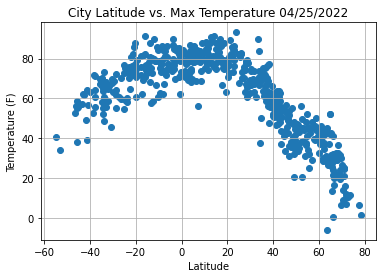

In [16]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Max Temp"], marker="o")
# Graph properties
plt.title(f'City Latitude vs. Max Temperature {time.strftime("%m/%d/%Y")}')
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Max Temperature.png")

# Show plot
plt.show()


As we can see, highest temperature is found arround 0.The plot shows that as we move from the equator, temperature decrease.

## Latitude vs. Humidity Plot

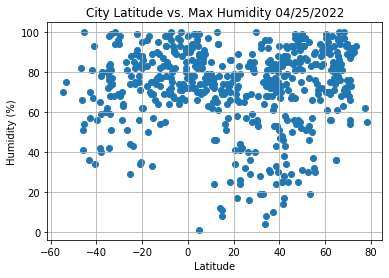

In [17]:
# Build a scatter plot 
plt.scatter(city_weather["Lat"], city_weather["Humidity"], marker="o")
# Graph properties
plt.title(f'City Latitude vs. Max Humidity {time.strftime("%m/%d/%Y")}')
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Humidity.png")

# Show plot
plt.show()

This plot shows that there are quasi no corelation between Latitude and Humidity. However we can see that as latitude is higher,humidity is higher in the Southern hemisphere

## Latitude vs. Cloudiness Plot

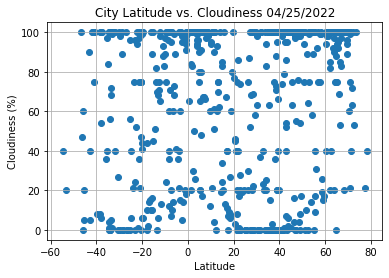

In [18]:
# Build a scatter plot for each data type
plt.scatter(city_weather["Lat"], city_weather["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness {time.strftime("%m/%d/%Y")}')
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Cloudiness.png")

# Show plot
plt.show()

We can observe in the plot that there are no correlation between Latitude and Cloudiness

## Latitude vs. Wind Speed Plot

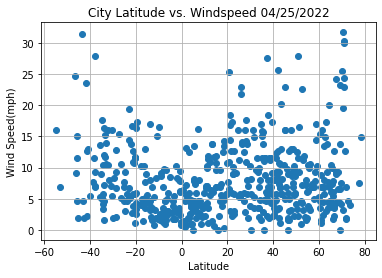

In [19]:
# Build a scatter plot 
plt.scatter(city_weather["Lat"], city_weather["Windspeed"], marker="o")

# Graph properties
plt.title(f'City Latitude vs. Windspeed {time.strftime("%m/%d/%Y")}')
plt.ylabel("Wind Speed(mph)")
plt.xlabel("Latitude")
plt.grid(True)
#Save the figure
plt.savefig("../Images/City Latitude vs Wind Speed.png")

# Show plot
plt.show()

The plot shows that there are no real relatinship between Latitude and Wind Speed

## Linear Regression

In [20]:
# linear regression equation and line to plot
def linear_reg_plot(x_values,y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_values.median(),y_values.median()),fontsize=15,color="red")
    plt.xlabel("Latitude")
    print(f"The r-squared is: {rvalue}")
    plt.show()

In [21]:
# Create Northern and Southern Hemisphere DataFrames
Northern_hemisphere = city_weather.loc[city_weather["Lat"]>0]
Southern_hemisphere = city_weather.loc[city_weather["Lat"]<0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8981118014027824


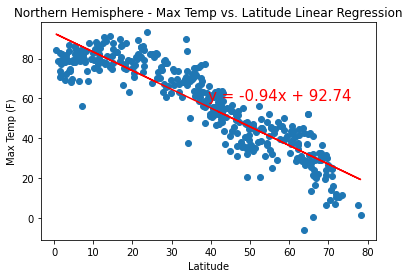

None


In [22]:
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.72520746736573


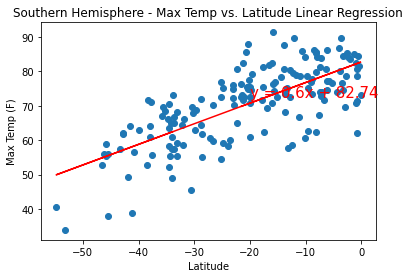

None


In [23]:
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Max Temp"]
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The Two previous plot show the following:
    The Northern Hemisphere displays a negative slope with a negative correlation between Temperature and Latitude, however the Southern Hemisphere displays a positive slope with a positive correlation between Temperature and Latitude.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.10439128426898711


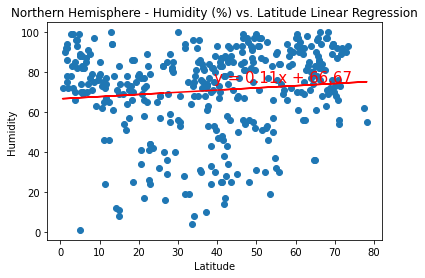

None


In [24]:
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Humidity"]
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.3004099986884258


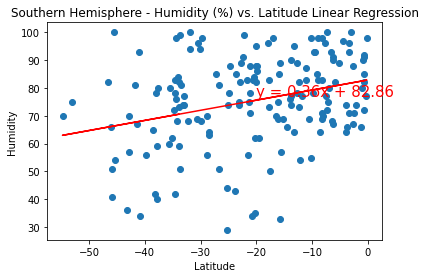

None


In [25]:
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Humidity"]
plt.ylabel("Humidity")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The two previous graphs show that there are no clear relationship beetween Humidity and Latitude in the northern and Southern Hemisphere.  


Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.1504902590012356


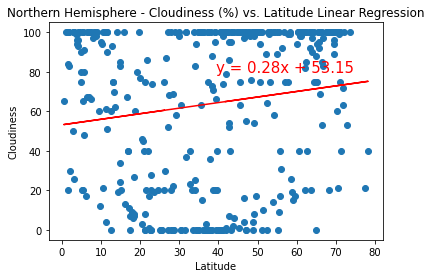

None


In [26]:
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.16183342343218632


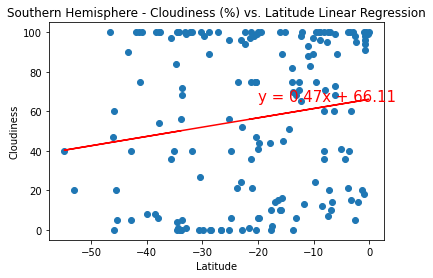

None


In [27]:
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Cloudiness"]
plt.ylabel("Cloudiness")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

The two previous graphs show a positive slope. We can indeed observe a weak positive correlation between latitude and Cloudiness for northern and Southern hemispheres.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.18408841456614253


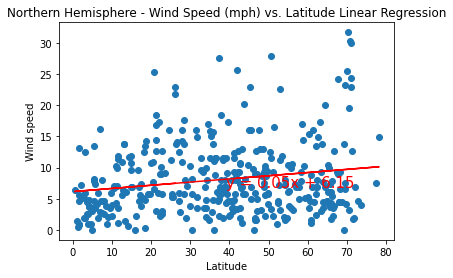

None


In [28]:
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = Northern_hemisphere["Lat"]
y_values = Northern_hemisphere["Windspeed"]
plt.ylabel("Wind speed")
# Save the figure
plt.savefig("../Images/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.42742118948850516


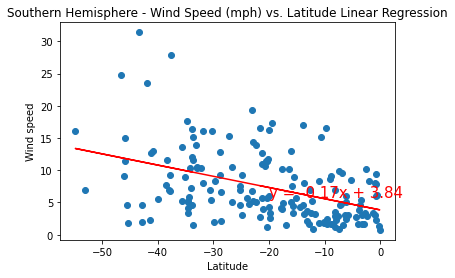

None


In [29]:
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
x_values = Southern_hemisphere["Lat"]
y_values = Southern_hemisphere["Windspeed"]
plt.ylabel("Wind speed")
# Save the figure
plt.savefig("../Images/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")
print(linear_reg_plot(x_values,y_values))

There are no clear relationship between Latitude and Wind Speed in the two previous graphs. 